# A beautiful way of looking at linear regressions
### This notebook contains the code related to [this article](https://towardsdatascience.com/a-beautiful-way-of-looking-at-linear-regressions-a4df174cdce) about linear regressions and orthogonal projections

<img src=Plot_LS.png width="800" />

Did you know that linear regressions are actually orthogonal projections? Whether you knew this or not you might want to read this article. It has a simple explanation for this and it also has some nice pictures! The code that is written below was used to generate some plots where a point in space is projected onto a plane formed by 2 vectors. This is similar to taking 3 data points and finding 2 linear regression coefficients that best fit those points. Before going through this code, it is better to read first the [article](https://towardsdatascience.com/a-beautiful-way-of-looking-at-linear-regressions-a4df174cdce).

## Implementation of the code

#### Importing the libraries

In [7]:
%matplotlib notebook
import numpy as np #NumPy https://numpy.org/
import matplotlib.pyplot as plt #Matplotlib https://matplotlib.org/
from mpl_toolkits.mplot3d import Axes3D  
from mpl_toolkits import mplot3d

#### Generating some useful functions
##### Coefficients:
This function calculates the linear regression coefficients considering the target values `t` and the matrix `A`:
<img src=Eq_Coeff.png width="200"/>
Remember that the matrix A will have as many rows as data points you have and as many columns as linear regression coefficients you want.

In [8]:
def Coefficients(A,t):
    c=np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),t)
    return c

##### Projection2D:
This function takes as input a matrix `A` and a target vector `t` and it calculates 3 things:
* From the matrix `A` it extracts the vectors that will create the 2D subspace. These vectors are saved in a dictionary `V` 
* It calculates the normal vector to the plane defined by `V`. This vector is called `normal`
* It calculates the projection of vector `t` onto the plane

In [9]:
def Projection2D(A,t):
    #Extract vectors from A
    V={}
    for i in range(A.shape[1]):
        V[i]=A[:,i]
    
    #Calculate normal vector
    normal=np.cross(V[0],V[1])
    
    #Calculate the projection of t onto the plane
    x=-(normal[0]*t[0]+normal[1]*t[1]+normal[2]*t[2])/(normal[0]**2+normal[1]**2+normal[2]**2)
    p=np.zeros(3)
    for i in range(p.shape[0]):
        p[i]=t[i]+normal[i]*x
    return p,normal,V

#### Visualizing the projection of the target vector onto the plane
The following code takes a vector `t` and projects it into the subspace formed by the columns of matrix `A`. The code is divided into 6 parts:

1. Definition of the input values: the matrix A and the target vector t
2. Plotting the plane defined by A
3. Plotting the points that correspond to the vectors, the target and the projection
4. Plotting some lines that help to better visualize the projection
5. Plotting annotations next to the vectors, the target and the projection
6. General settings for the plot

<IPython.core.display.Javascript object>


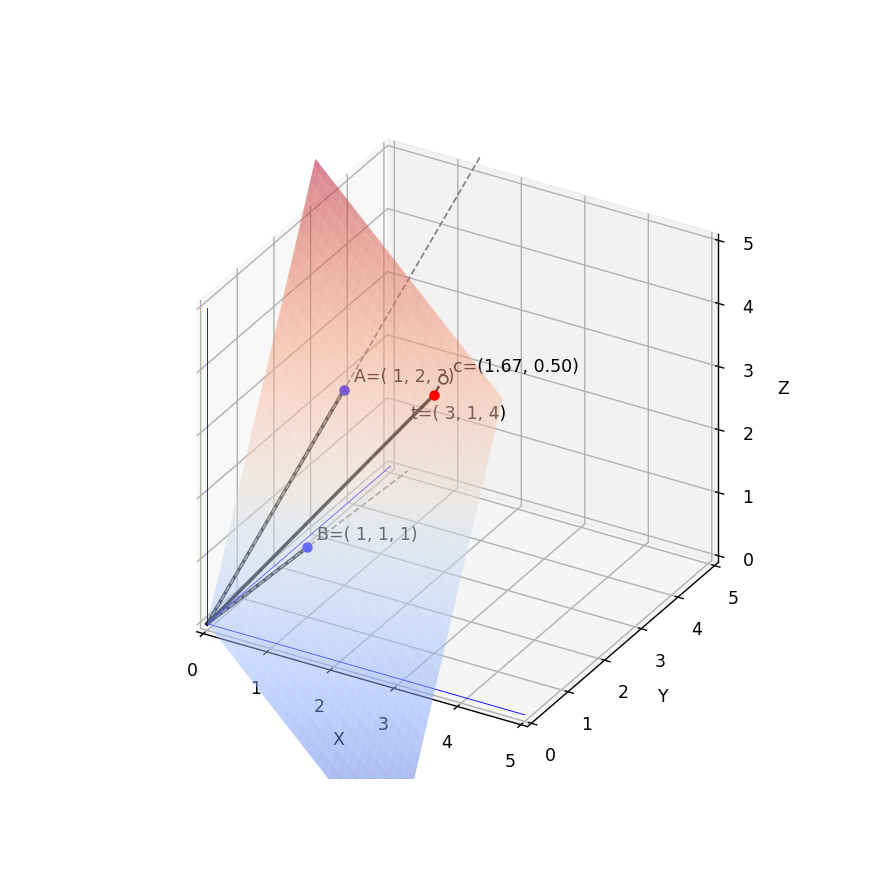

In [10]:
# 1. DEFINE A AND t
A=np.array([[1, 1], [1, 2],[1,3]]) #WRITE HERE THE VALUES FOR MATRIX A
t=np.array([[3],[1],[4]]) #WRITE HERE THE VALUES FOR VECTOR t

# 2. PLOT THE 2D SUBSPACE FORMED BY MATRIX A
#  2a. Calculate the vectors, the normal vector to the plane and the projection of t onto the plane
p,normal,V=Projection2D(A,t)

#  2b. Use the normal vector to plot the plane in space
def fun(x, y):
    return (-normal[0]*x-normal[1]*y)/normal[2]
fig = plt.figure(figsize=(7, 7))
ax=plt.axes(projection='3d')
ax.set_proj_type('ortho')
x = y = np.arange(0, 3, 0.05) #Modify this to change the extension of the plane
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
ax.plot_surface(X, Y, Z,cmap='coolwarm', alpha=0.5) #surface
#If you want to check the color go to this page: https://matplotlib.org/stable/tutorials/colors/colormaps.html

# 3. PLOT THE POINTS
#  3a. Vector1 and Vector2
ax.scatter3D(V[0][0], V[0][1], V[0][2], c='blue', s=25 )
ax.scatter3D(V[1][0], V[1][1], V[1][2], c='blue', s=25 )
#  3b. Target
ax.scatter3D(t[0], t[1], t[2], c='red', s=25 )
#  Projection on the plane
ax.scatter3D(p[0], p[1], p[2], s=25,edgecolors='black', c='white') 

# 4. PLOT THE LINES
#  4a. Lines that represent vectors 1 and 2
ax.plot3D([0,V[0][0]],[0,V[0][1]],[0,V[0][2]],'black', lw=2, )
ax.plot3D([0,V[1][0]],[0,V[1][1]],[0,V[1][2]],'black', lw=2, )

#  4b. Lines to extend Vector 1 and 2
ax.plot3D([-0*V[0][0],2*V[0][0]],[-0*V[0][1],2*V[0][1]],[-0*V[0][2],2*V[0][2]],'grey', lw=1, linestyle='--' ) 
ax.plot3D([-0*V[1][0],2*V[1][0]],[-0*V[1][1],2*V[1][1]],[-0*V[1][2],2*V[1][2]],'grey', lw=1, linestyle='--' ) 

#  4c. Line that represents target vector
ax.plot3D([0,t[0]],[0,t[1]],[0,t[2]],'black', lw=2, )

#  4d. Line that goes from the target vector to the projection
ax.plot3D([t[0],p[0]],[t[1],p[1]],[t[2],p[2]],'black', linestyle='--') 

#  4e. Blue lines to represent the x,y,z axis. Modify the extension of the lines if you need to.
ax.plot3D([0,5],[0,0],[0,0],'blue',lw=0.5)
ax.plot3D([0,0],[0,5],[0,0],'blue',lw=0.5)
ax.plot3D([0,0],[0,0],[0,5],'blue',lw=0.5)

#5. ANNOTATIONS
#  5a. Calculate the linear regression coefficients or the position of the projection with respect to the plane
x=Coefficients(A,t)

#  5b. Annotations for the coefficients c
ax.text(p[0]+0.1, p[1]+0.1, p[2]+0.1, 'c=(%2.2f, %2.2f)' % (x[0],x[1]) , color='black') 

#  5c. Annotations for the target vector
ax.text(float(t[0])+0.5, float(t[1])-1.5, float(t[2])+0.5, 't=(%2d,%2d,%2d)' % (t[0],t[1],t[2]) , color='black')

#  5d. Annotations for the vectors that defined the plane
ax.text(V[0][0]+0.1, V[0][1]+0.1, V[0][2]+0.1, 'B=(%2d,%2d,%2d)' % (V[0][0],V[0][1],V[0][2]) , color='black')#VectorA
ax.text(V[1][0]+0.1, V[1][1]+0.1, V[1][2]+0.1, 'A=(%2d,%2d,%2d)' % (V[1][0],V[1][1],V[1][2]) , color='black')#VectorB

#6. PLOT SETTINGS
#  6a. Axis' labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#  6b. Axis' limits 
ax.set_xlim3d(0, 5) #Here it is important to define the same length for all axis in order to see the orthogonality
ax.set_ylim3d(0, 5)
ax.set_zlim3d(0, 5)
#ax.view_init(0, 0)
plt.show()